In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Akhil\Desktop\data analytics\Customer-Churn-analysis-main\Customer Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replace blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

In [11]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

In [12]:
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

conerted o and 1 vallues of senior citizen to yes/no to make it easier to understand

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


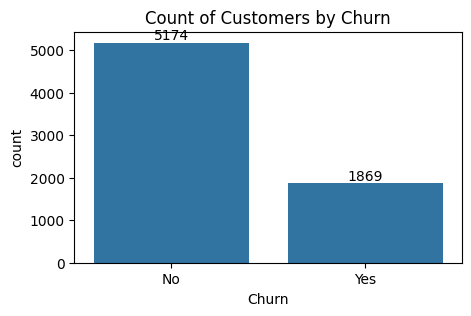

In [14]:
plt.figure(figsize=(5,3))
ax=sns.countplot(df,x="Churn")

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Customers by Churn")
plt.show()

In [15]:
gb=df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


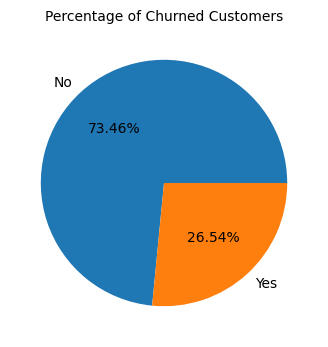

In [16]:
plt.figure(figsize=(4,4))
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

from the given pie chart we can conclude that 26.54% of customers have churned out
now lets wxplore the reason brhind it

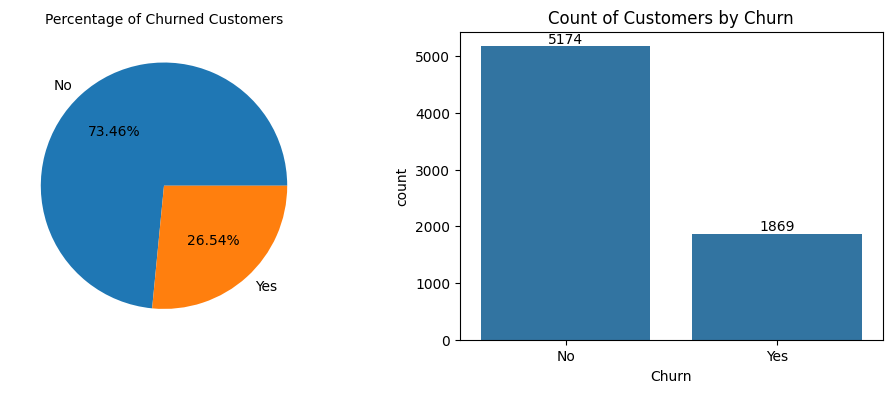

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)

plt.subplot(1,2,2)
ax=sns.countplot(df,x="Churn")
plt.title("Count of Customers by Churn")
for bars in ax.containers:
    ax.bar_label(bars)

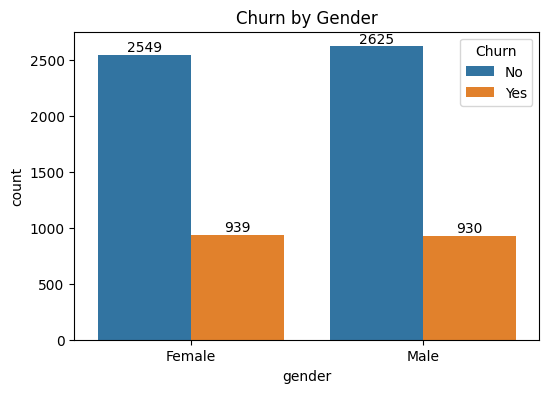

In [26]:
plt.figure(figsize=(6,4))
ax=sns.countplot(df,x="gender",hue="Churn")

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Churn by Gender")
plt.show()

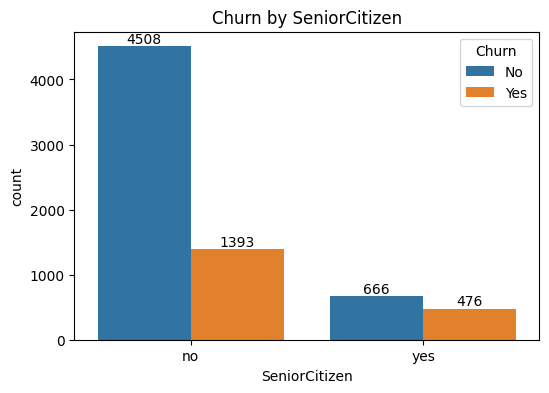

In [19]:
plt.figure(figsize=(6,4))
ax=sns.countplot(df,x="SeniorCitizen",hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Churn by SeniorCitizen")
plt.show()

code taken from chatGPT

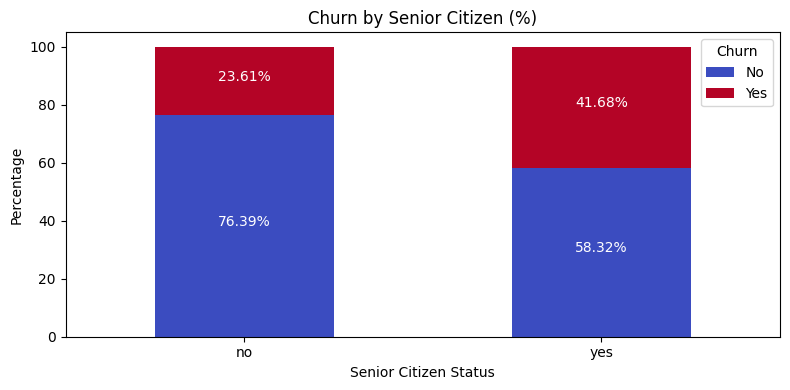

In [20]:
# Calculate percentage of each category
grouped = df.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="Count")
total_counts = grouped.groupby("SeniorCitizen")["Count"].transform("sum")
grouped["Percentage"] = (grouped["Count"] / total_counts * 100).round(2)

# Pivot data to create stacking
pivot = grouped.pivot(index="SeniorCitizen", columns="Churn", values="Percentage").fillna(0)

# Plot the stacked bar chart
pivot.plot(kind="bar", stacked=True, figsize=(8,4), colormap="coolwarm")

# Add labels to the bars
for i, row in enumerate(pivot.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            plt.text(i, cumulative + val / 2, f"{val}%", ha="center", color="white", fontsize=10)
            cumulative += val

# Customize the plot
plt.title("Churn by Senior Citizen (%)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen Status")
plt.legend(title="Churn", loc="upper right")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

comparitavely a greater % of people in senior citizen category have churned 

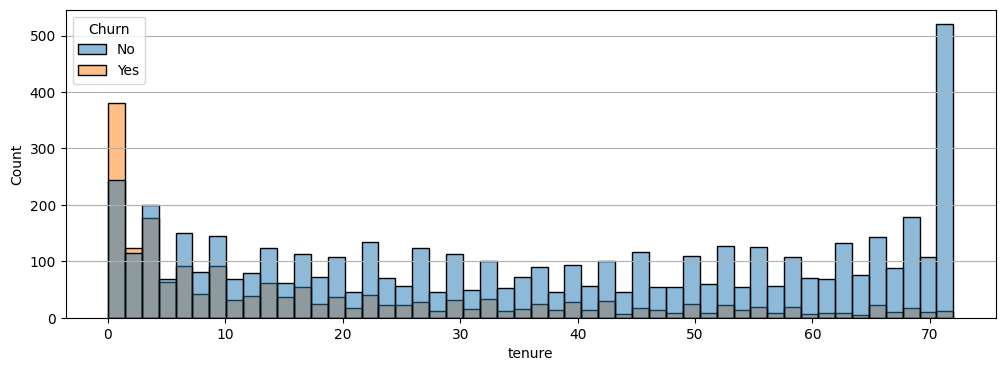

In [21]:
plt.figure(figsize=(12,4))
ax=sns.histplot(df,x="tenure",bins=50,hue="Churn")
plt.grid(axis="y")
plt.show()

people who have used our services for a long time have stayed and people who have used our services for short time have churned

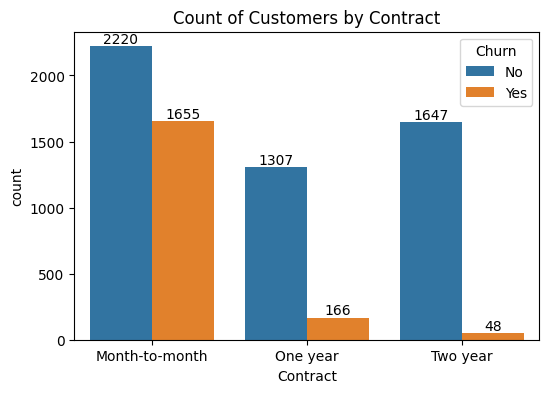

In [22]:
plt.figure(figsize=(6,4))
ax=sns.countplot(df,x="Contract",hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Customers by Contract")
plt.show()

people who have month to month contract are likely to churn from those who have one or two years of contract

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

code taken from chatGPT

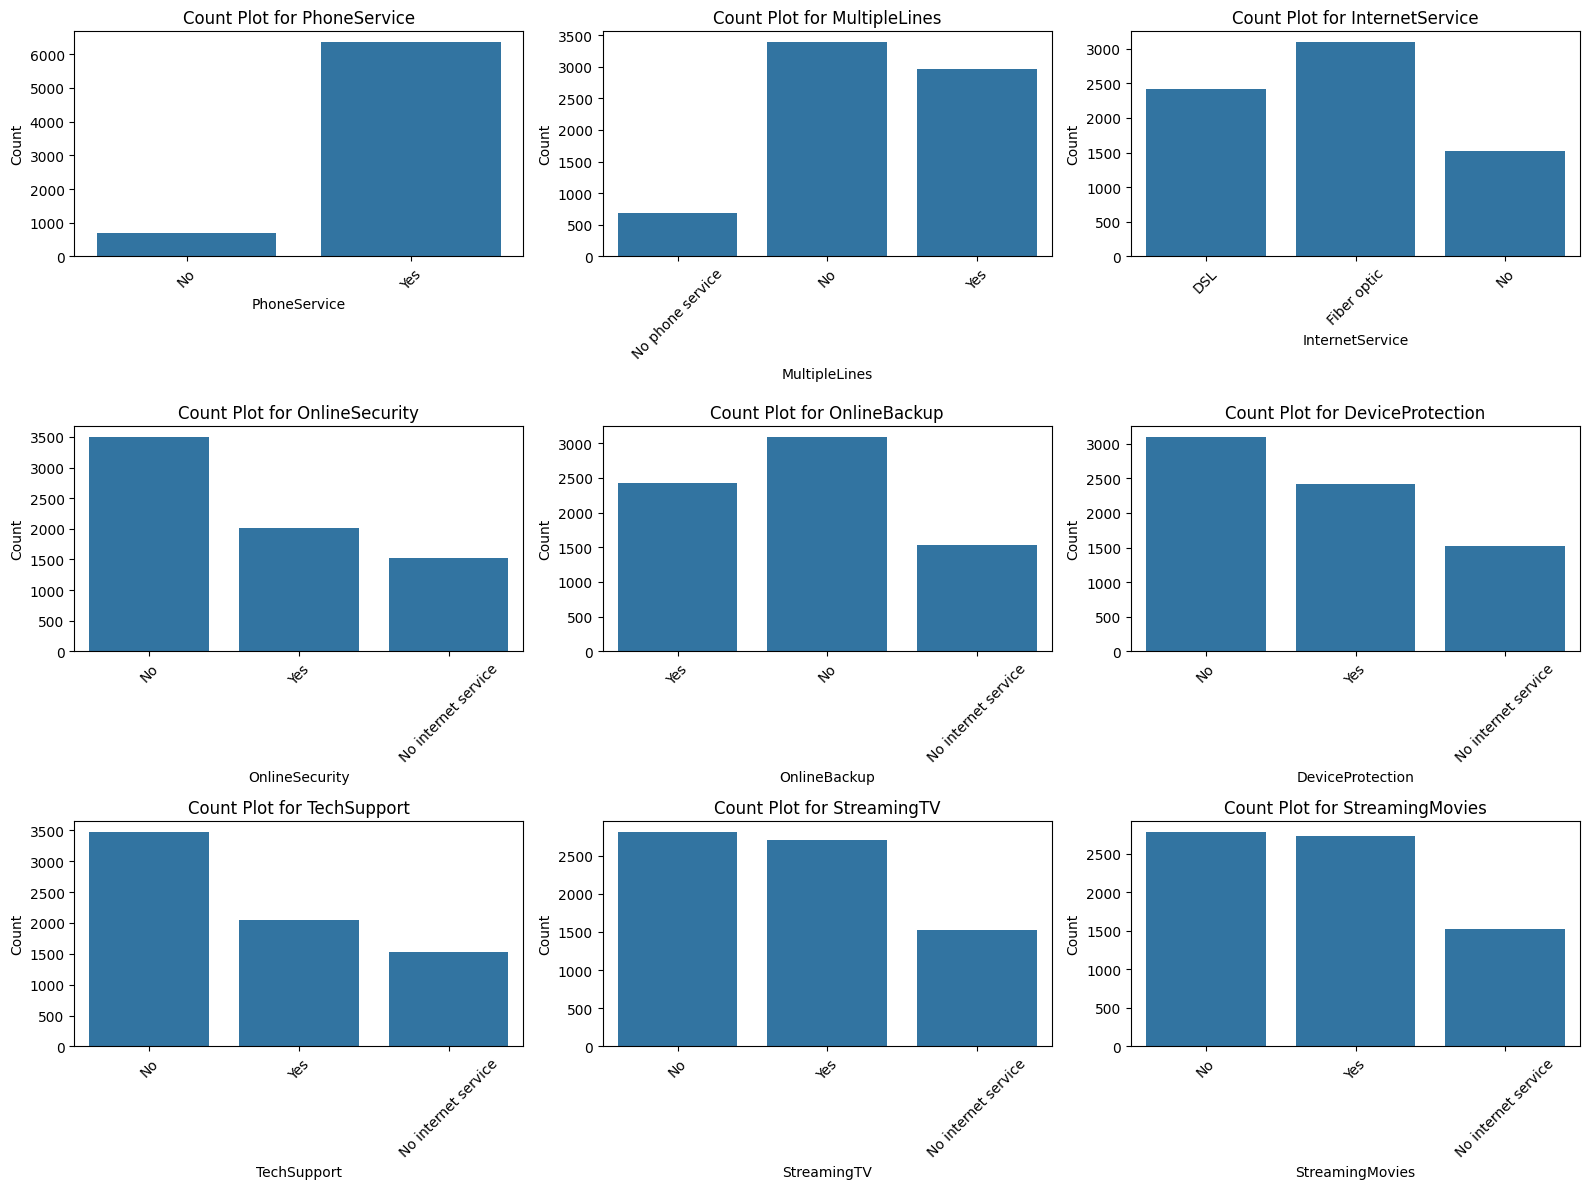

In [24]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of rows and columns for subplots
num_cols = 3  # Number of subplots per row
num_rows = -(-len(columns) // num_cols)  # Ceiling division for total rows needed

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

# Create a countplot for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Count Plot for {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

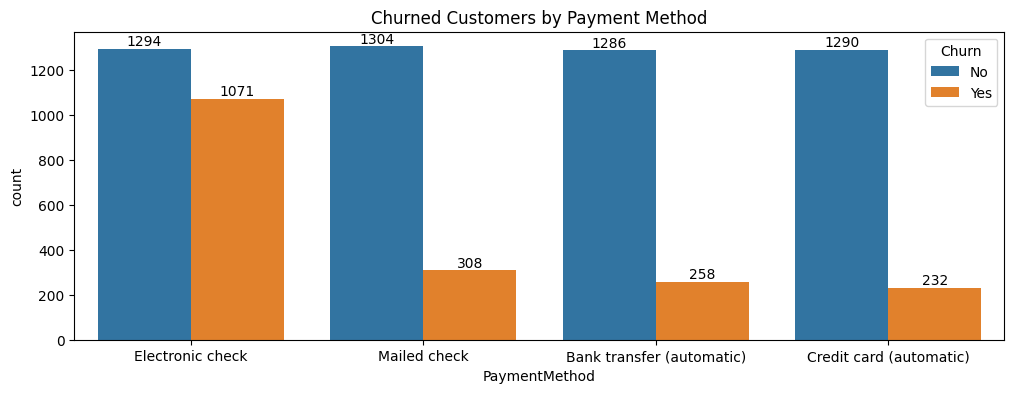

In [25]:
plt.figure(figsize=(12,4))
ax=sns.countplot(df,x="PaymentMethod",hue="Churn")

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Churned Customers by Payment Method")
plt.show()

customer is likely to churn when electronic method is electronic